/home/udaram/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/udaram/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/udaram/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/udaram/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/udaram/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-v

Accuracy:: 0.8431372549019608


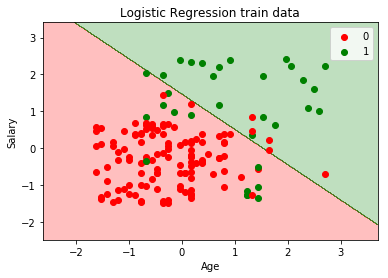

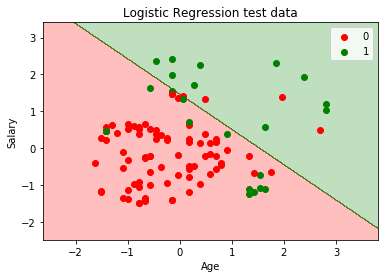

In [21]:
#importing libraries and packages
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
#getting data from csv file
dataset = pd.read_csv('social_Network_ads.csv')

x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[4]].values


#splitting Data for testing and training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

#scaling the data 
s = preprocessing.StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

#importin Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression

#fitting data to classifier model
clf = LogisticRegression(random_state=0)
clf.fit(x_train,y_train)

#predictind data to calculate accuracy of model using test set of data 
y_pred = clf.predict(x_test)
correct=0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct+=1
print("Accuracy::",correct/len(y_pred))

#visualising the train data 
x0,x1 = np.meshgrid(np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1, step = 0.01),
                    np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1, step = 0.01))
plt.contourf(x0,x1,clf.predict(np.array([x0.ravel(), x1.ravel()]).T).reshape(x0.shape),
             alpha = 0.25, cmap = ListedColormap(('r', 'g')))
#first method
colors={0:'r',1:'g'}
i=0
for i in range(len(x_train)-1):
    plt.scatter(x_train[i,0],x_train[i,1],c=colors[y_train[i,0]])
plt.scatter(x_train[i,0],x_train[i,1],c=colors[0],label='0')
plt.scatter(x_train[i,0],x_train[i,1],c=colors[1],label='1')

#second method
#for i,j in enumerate(np.unique(y_train)):
#   plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],
#               c = ListedColormap(('red', 'green'))(i), label = j, s=25)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Logistic Regression train data")
plt.legend()
plt.show()

#visualising the test data 
x0,x1 = np.meshgrid(np.arange(start=x_test[:,0].min()-1,stop=x_test[:,0].max()+1, step = 0.01),
                    np.arange(start=x_test[:,1].min()-1,stop=x_test[:,1].max()+1, step = 0.01))
plt.contourf(x0,x1,clf.predict(np.array([x0.ravel(), x1.ravel()]).T).reshape(x0.shape),
             alpha = 0.25, cmap = ListedColormap(('r', 'g')))
#first method
colors={0:'r',1:'g'}
i=0
for i in range(len(x_test-1)):
    plt.scatter(x_test[i,0],x_test[i,1],c=colors[y_test[i,0]])
plt.scatter(x_test[i,0],x_test[i,1],c=colors[0],label='0')
plt.scatter(x_test[i,0],x_test[i,1],c=colors[1],label='1')

#second method
#for i,j in enumerate(np.unique(y_train)):
#   plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],
#               c = ListedColormap(('red', 'green'))(i), label = j, s=25)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Logistic Regression test data")
plt.legend()
plt.show()